## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
# Load data
df = pd.read_csv('ABBV-AbbVie.csv')

## Data preprocessing

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,79.769997,80.849998,79.279999,80.099998,62.999912,8567900
2019-03-04,80.400002,80.730003,79.110001,79.459999,62.496529,5872500
2019-03-05,79.379997,79.900002,78.720001,78.910004,62.063969,5933100
2019-03-06,79.129997,79.129997,77.559998,78.089996,61.419025,5293200
2019-03-07,77.769997,79.120003,77.440002,78.239998,61.537003,6642500
...,...,...,...,...,...,...
2024-02-23,177.259995,178.910004,177.009995,178.089996,176.442200,3941800
2024-02-26,178.839996,179.789993,178.000000,178.809998,177.155533,4327400
2024-02-27,178.770004,179.529999,176.979996,178.990005,177.333878,3888500


## Scale Data

In [4]:
# Select 'Close' column
data = df['Close'].values

In [5]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

## Split the data into train and test

In [6]:
# Define the size of train and test
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

# Split the data into train and test set
train_data = data_scaled[0 : train_size, :]
test_data = data_scaled[train_size : len(data_scaled), :]

## Create and add data into X, y

In [7]:
def add_data(data, sequence_length=1):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : (i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [8]:
# Reshape into X=t,t+1,t+2..t+60 and Y=t+60
sequence_length = 60

# Get last data for test
train_last_windowsize = train_data[-sequence_length:]

test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Build Model

In [9]:
model = Sequential() # Encapsulate the sequence of the inner layers

# 4 LSTM layers
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# 1 Dense layer
model.add(Dense(units=1)) 

# Optimizer
model.compile(optimizer = 'adam', loss='mean_squared_error')

D:\Anaconda\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
30/30 - 7s - 222ms/step - loss: 0.0382
Epoch 2/50
30/30 - 1s - 47ms/step - loss: 0.0059
Epoch 3/50
30/30 - 1s - 49ms/step - loss: 0.0052
Epoch 4/50
30/30 - 2s - 51ms/step - loss: 0.0052
Epoch 5/50
30/30 - 2s - 52ms/step - loss: 0.0047
Epoch 6/50
30/30 - 2s - 63ms/step - loss: 0.0044
Epoch 7/50
30/30 - 2s - 63ms/step - loss: 0.0047
Epoch 8/50
30/30 - 3s - 85ms/step - loss: 0.0048
Epoch 9/50
30/30 - 2s - 69ms/step - loss: 0.0041
Epoch 10/50
30/30 - 1s - 49ms/step - loss: 0.0041
Epoch 11/50
30/30 - 2s - 52ms/step - loss: 0.0039
Epoch 12/50
30/30 - 2s - 67ms/step - loss: 0.0037
Epoch 13/50
30/30 - 2s - 60ms/step - loss: 0.0037
Epoch 14/50
30/30 - 2s - 53ms/step - loss: 0.0038
Epoch 15/50
30/30 - 1s - 50ms/step - loss: 0.0036
Epoch 16/50
30/30 - 1s - 48ms/step - loss: 0.0035
Epoch 17/50
30/30 - 2s - 53ms/step - loss: 0.0035
Epoch 18/50
30/30 - 1s - 50ms/step - loss: 0.0032
Epoch 19/50
30/30 - 1s - 49ms/step - loss: 0.0033
Epoch 20/50
30/30 - 2s - 52ms/step - loss: 0.0029
Epoch 21

## Predict and Inverse Transform the Predictions

In [11]:
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step


## Calculate the error of the model

In [12]:
# The error in test set
test_mape = mean_absolute_percentage_error(y_pred, y_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: ", test_mape)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAPE on Test set:  0.020646781684147342
RMSE on Test set:  3.8990600913938516
MSLE on Test set:  0.0006646730303876051


## Predict Close price for 60 next days

In [13]:
# Select the last day of current index
last_date = df.index[-1]

# Add a new day after the last day
next_date = last_date + pd.DateOffset(days=1)

# Generate a list of index only starting from the next day in 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

# Predict Close price for 60 next days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, -1, 1)

y_next_60_days = []

for i in range(60):
    # Predict Close price for next day
    next_day_pred = model.predict(last_sequence_days)
    
    # Save the predict value
    y_next_60_days.append(next_day_pred[0][0])
    
    # Update information of the next day
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/ste

In [14]:
# Show the result of predict 60 next days 
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1))
print(y_next_60_days.flatten())

[173.58981 173.61322 173.27501 172.64394 171.83183 170.94716 170.07278
 169.2611  168.53839 167.91283 167.38136 166.93555 166.5647  166.25781
 166.00409 165.79343 165.61635 165.4641  165.3289  165.20403 165.08398
 164.9644  164.84221 164.71548 164.58328 164.44554 164.30289 164.1564
 164.00749 163.85771 163.70874 163.56206 163.4191  163.28102 163.1487
 163.02272 162.90356 162.7914  162.68614 162.58759 162.49545 162.40926
 162.32854 162.25273 162.18129 162.1137  162.04945 161.98813 161.9293
 161.87268 161.81802 161.76514 161.7139  161.66418 161.61589 161.56905
 161.5236  161.4796  161.43704 161.39586]


## Model visualization

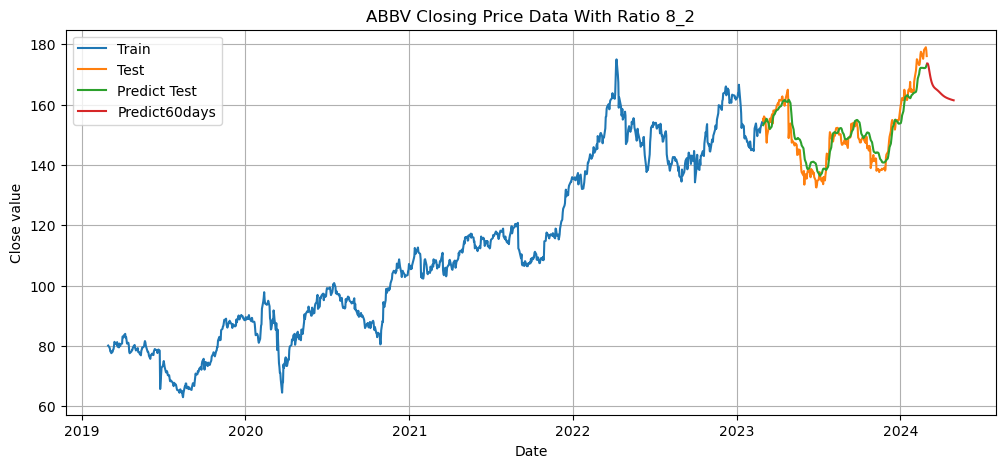

In [15]:
plt.figure(figsize=(12, 5))

# Train set
plt.plot(df[:train_size].index, train_data)

# Test set
plt.plot(df[train_size:].index, test_data)

# Predict in test set
plt.plot(df[train_size:].index, y_pred)

# Predict 60 next days
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict Test', 'Predict60days'])
plt.grid()
plt.title("ABBV Closing Price Data With Ratio 8_2")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('Image/RNN_82_60days_ABBV.png')
plt.show()